<a href="https://colab.research.google.com/github/Marvsr05/SC-Sesi2/blob/main/SC_Sesi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
a = [
    [8, 3, -3],
    [-2, -8, 5],
    [3, 5, 10]
]

diag = np.diag(np.abs(a))
off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')
print(a)
print(type(a))


matrix is diagonally dominant
[[8, 3, -3], [-2, -8, 5], [3, 5, 10]]
<class 'list'>


In [29]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

In [30]:
print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-3*x2+3*x3)/8
    x2 = (5+2*x1-5*x3)/(-8)
    x3 = (-8-3*x1-5*x2)/(10)
    x = np.array([x1, x2, x3])
    dx = np.sqrt(np.dot(x-x_old, x-x_old))

    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged')
        break
    x_old = x
if not converged:
    print('Not converge, increase the number of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, -0.7937
2, 1.8508, -1.5838, -0.5633
3, 2.1327, -1.5103, -0.6847
4, 2.0596, -1.5678, -0.6340
5, 2.1002, -1.5463, -0.6569
6, 2.0835, -1.5565, -0.6468
7, 2.0911, -1.5520, -0.6513
Converged


In [28]:
A = np.array([[4,3,-5],
             (-2,-2,5),
             [8,8,0]])
y = np.array([2,5,-3])
x = np.linalg.solve(A, y)
print(x)

[ 7.375 -7.75   0.85 ]


In [31]:
#matrix inversion
A_inv = np.linalg.inv(A)
x = A_inv.dot(y)
print(x)

[ 7.375 -7.75   0.85 ]


Koefisien regresi: m = 1.6256, c = 0.9713
Solusi dengan Cholesky: m = 1.6256, c = 0.9713


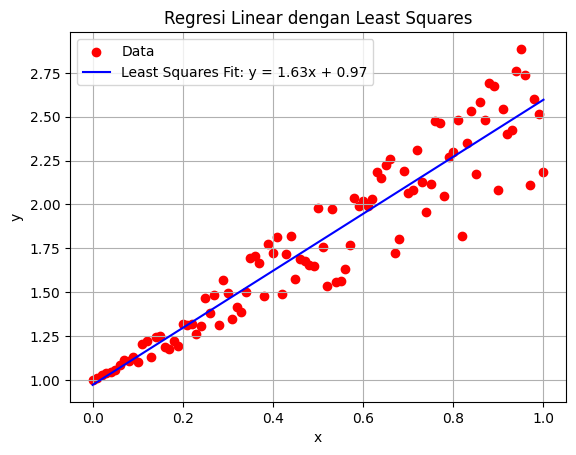

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))  # y = 1 + x + noise

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(f"Koefisien regresi: m = {m:.4f}, c = {c:.4f}")

AtA = A.T @ A
Atb = A.T @ y

L = linalg.cholesky(AtA, lower=True)
y_intermediate = linalg.solve(L, Atb)
theta = linalg.solve(L.T, y_intermediate)

print(f"Solusi dengan Cholesky: m = {theta[0]:.4f}, c = {theta[1]:.4f}")

plt.scatter(x, y, color="red", label="Data")
plt.plot(x, m * x + c, color="blue", label=f"Least Squares Fit: y = {m:.2f}x + {c:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresi Linear dengan Least Squares")
plt.grid(True)
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def gauss_seidel(A, b, x_init, tol=1e-6, max_iter=1000):
    x = np.array(x_init, dtype=float)
    n = len(b)

    for _ in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            sum_ = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - sum_) / A[i, i]

        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            break

    return x

# Soal 1
A1 = np.array([[4, 3, -1], [1, -6, 2], [3, 2, 5]], dtype=float)
b1 = np.array([10, 4, 14], dtype=float)
x_init1 = [2, 1, 1]
solution_gs1 = gauss_seidel(A1, b1, x_init1)
solution_np1 = np.linalg.solve(A1, b1)
print("Soal 1 - Gauss-Seidel:", solution_gs1)
print("Soal 1 - Numpy:", solution_np1)

Soal 1 - Gauss-Seidel: [2.66666703 0.15686296 1.1372546 ]
Soal 1 - Numpy: [2.66666667 0.15686275 1.1372549 ]


In [26]:
# Soal 2
A2 = np.array([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]], dtype=float)
b2 = np.array([7.85, -19.3, 71.4], dtype=float)
x_init2 = [1, 2, 3]
solution_gs2 = gauss_seidel(A2, b2, x_init2)
solution_np2 = np.linalg.solve(A2, b2)
print("Soal 2 - Gauss-Seidel:", solution_gs2)
print("Soal 2 - Numpy:", solution_np2)

Soal 2 - Gauss-Seidel: [ 3.  -2.5  7. ]
Soal 2 - Numpy: [ 3.  -2.5  7. ]


Soal 3 - Regresi Linear: y = 2.00x + 0.00


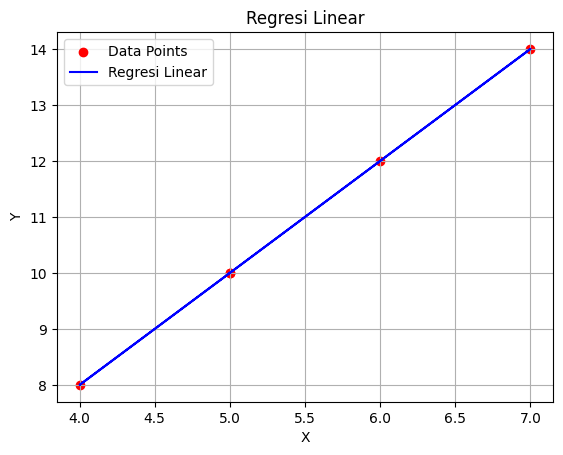

In [27]:
# Soal 3
X = np.array([5, 4, 6, 7, 5])
Y = np.array([10, 8, 12, 14, 10])
X_mean = np.mean(X)
Y_mean = np.mean(Y)
a = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
b = Y_mean - a * X_mean
print(f"Soal 3 - Regresi Linear: y = {a:.2f}x + {b:.2f}")

plt.scatter(X, Y, color="red", label="Data Points")
plt.plot(X, a * X + b, color="blue", label="Regresi Linear")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresi Linear")
plt.legend()
plt.grid(True)
plt.show()